In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats,integrate
from scipy.optimize import minimize_scalar

%precision 3
%matplotlib inline

In [3]:
# 그래프에서 선의 종류
linestyles = ['-', '--', ':']

In [4]:
def E( X, g = lambda x: x):
    x_range, f = X
    def integrand ( x ):
        return g( x ) * f ( x )

    return integrate.quad ( integrand, -np.inf, np.inf ) [ 0 ]                     

In [5]:
def V( X, g = lambda x: x):
    x_range, f = X
    mean = E( X, g)
    def integrand ( x ):
        return  (g( x ) - mean )**2 * f (x )
    return integrate.quad ( integrand, -np.inf, np.inf ) [ 0 ]   

In [6]:
def check_prob (X):
    x_range , f= X

    f_min = minimize_scalar( f ).fun
    assert f_min >=0 , ' 확률함수가 마이너스 값을 가짐'
    prob_sum = np.round ( integrate.quad ( f, -np.inf, np.inf) [0],6)
    assert prob_sum == 1, f'확률의 합이 1이 아닌 다음의 값임:{prob_sum}'
    print ( f'expected value {E(X):.3f}')
    print ( f'variance { V(X):.3f}')


In [7]:
def plot_prob( X , x_min, x_max ):
    x_range, f = X
    def F(x):
        return integrate.quad ( f, -np.inf, x) [0]

    xs = np.linspace (x_min, x_max, 100)

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)

    ax.plot ( xs, [ f(x) for x in xs],
              label = 'f(x)', color = 'gray')
    ax.plot ( xs, [ F(x) for x in xs],
              label = 'F(x)', ls= '--' , color = 'red')
    
    ax.legend()
    plt.show()

In [8]:
# F 분포
#    확률변수 Y1,Y2는 서로 독립이고, 
#    각각 Y1 ~ chi-squre(n1), Y2 ~ chi-squre(n2)을 따르고 있을 때,
#    F = (Y1/n1) / (Y2/n2) 의 확률분포를 
#    자유도가 n1, n2인 F분포 F(n1,n2)라고 한다.
#       0이상인 실수의 값을 취한다.

n1 = 5
n2 = 10
rv1 = stats.chi2 (n1)
rv2 = stats.chi2 (n2)

# 표본 크기 10만으로 무작위추출한다. 
# F변수 정의에 따라 식을 세운다
sample_size = int (1e5)
sample1 = rv1.rvs ( sample_size)
sample2 = rv2.rvs ( sample_size)

f_sample = (sample1/n1) / (sample2/n2)

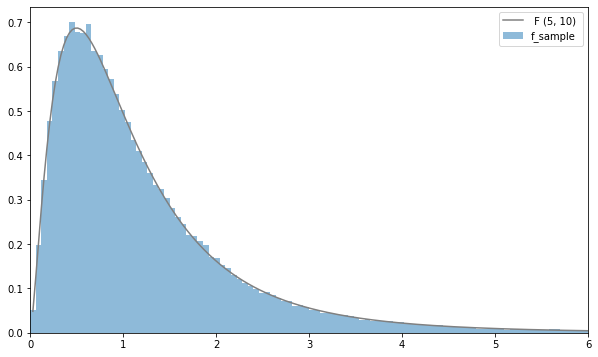

In [10]:
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)

    rv = stats.f( n1, n2 )
    xs = np.linspace ( 0, 6, 200) [1:]
    ax.hist ( f_sample, bins = 100, range = ( 0, 6 ),
              density = True, alpha = 0.5, label = 'f_sample')
    ax.plot ( xs, rv.pdf (xs),
              label = f' F ({n1}, {n2}) ', color ='gray')
    ax.legend()
    ax.set_xlim(0 ,6)
    plt.show()

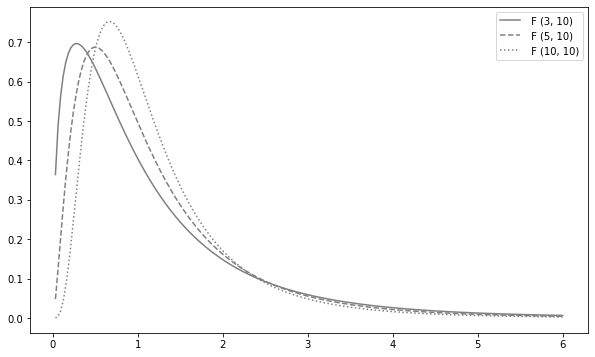

In [11]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace ( 0, 6, 200) [1:]
for n1, ls in zip([ 3, 5, 10], linestyles):
    rv = stats.f( n1, 10 )
    ax.plot (xs, rv.pdf (xs),
             label = f' F ({n1}, 10)', ls=ls, color ='gray')

ax.legend()
plt.show()

In [12]:
# F 분포의 특징은
# 1번 좌우비대칭으로, 왼쪽으로 치우치고 오른쪽으로 넓어지는 분포
# 2번 분포의 정점은 1에 가까움